In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df_sales = pd.read_csv('sales.csv')
df_inventory = pd.read_csv('gyapu.product.csv')

/var/folders/3y/yxfc9cms7ss262pddd2ymh_40000gp/T/ipykernel_91972/1130643926.py:6: DtypeWarning: Columns (63,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  df_inventory = pd.read_csv('gyapu.product.csv')


In [2]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99415 entries, 0 to 99414
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           99415 non-null  object 
 1   product_id    99415 non-null  object 
 2   product_name  99415 non-null  object 
 3   url_key       99415 non-null  object 
 4   variant_id    99415 non-null  object 
 5   quantity      99415 non-null  int64  
 6   sales_price   99415 non-null  float64
 7   sales_amount  99415 non-null  float64
 8   customer_pay  99415 non-null  float64
 9   cart_id       99415 non-null  object 
 10  customer_id   51651 non-null  object 
 11  added_at      99415 non-null  object 
 12  user_id       85901 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 9.9+ MB


In [3]:
df_inventory = df_inventory[["_id", "name", "brand", "category", "variant.inventory" ]]

In [4]:
# Remove rows where 'variant.inventory' is missing
stock_data_cleaned = df_inventory.dropna(subset=['variant.inventory'])

# Verify that missing values are removed
print(stock_data_cleaned.isnull().sum())


_id                   0
name                  0
brand                75
category             38
variant.inventory     0
dtype: int64


In [5]:
# Group by '_id' and sum the 'variant.inventory'
stock_data_grouped = stock_data_cleaned.groupby('_id').agg({
    'variant.inventory': 'sum',
    'name': 'first',  # Keep the first occurrence of 'name' for each group
    'brand': 'first',  # Keep the first occurrence of 'brand' for each group
    'category': 'first'  # Keep the first occurrence of 'category' for each group
}).reset_index()

In [6]:
# Verify that missing values are removed
print(stock_data_cleaned.isnull().sum())

_id                   0
name                  0
brand                75
category             38
variant.inventory     0
dtype: int64


In [7]:
# Rename the 'variant.inventory' column to 'inventory'
stock_data_grouped.rename(columns={'variant.inventory': 'inventory'}, inplace=True)

# Display the updated dataset with the new column name
print(stock_data_grouped.head())


                        _id  inventory  \
0  5e609b074c99524a4680d4d7       50.0   
1  5e60adff4c99524a4680d585       17.0   
2  5e62282c8cb5a6690948745b       35.0   
3  5e6234118cb5a669094874b1       12.0   
4  5e67878b7f1e0a4da1c06bef        4.0   

                                                name  \
0  Samsung Galaxy Note 9 N960U 128GB Verizon + GS...   
1                                   perfume lavender   
2               Plain Grey Color Double Pocket Shirt   
3                                            Lehenga   
4                Killer Navy blue plain cotton shirt   

                      brand                  category  
0  5e3a72384ae64f55f7749bc0  5e367cf85c1dfa0148b2dc18  
1  5e3a67594ae64f55f7749a03  5e390327f0259d1176a3a4f8  
2  5e37a674f0259d1176a38f93  5e61e93b8cb5a669094872e5  
3                      None  5e390195f0259d1176a3a4ce  
4                      None  5e390172f0259d1176a3a4cd  


In [8]:
# Merge the sales data with the grouped stock data
merged_data = pd.merge(df_sales, stock_data_grouped, how='left', left_on='product_id', right_on='_id')

# Display the first few rows of the merged dataset
print(merged_data.head())


                      _id_x                product_id  \
0  5e86a5aae463693ae6692c7b  5e8612dae463693ae6692214   
1  5e86a5ede463693ae6692c81  5e8627d4e463693ae66925ac   
2  5e86a647e463693ae6692c8f  5e861a98e463693ae66922f3   
3  5e86b02ae463693ae6692e07  5e862724e463693ae669251c   
4  5e86b6dde463693ae6692ea0  5e8612dae463693ae6692214   

                 product_name                   url_key  \
0              Mass Dal 1000g            mass-dal-1000g   
1    Param Kesar Drink  180ml   param-kesar-drink-180ml   
2         All in one 200 gram       all-in-one-200-gram   
3  Chocogold Choclate (14gms)  chocogold-choclate-14gms   
4              Mass Dal 1000g            mass-dal-1000g   

                 variant_id  quantity  sales_price  sales_amount  \
0  5e8612dae463693ae6692217         1        160.0         160.0   
1  5e8627d4e463693ae66925af         3         85.0         255.0   
2  5e861a98e463693ae66922f6         1        103.0         103.0   
3  5e862724e463693ae669251f   

In [9]:
# Verify that missing values are removed
print(merged_data.isnull().sum())

_id_x               0
product_id          0
product_name        0
url_key             0
variant_id          0
quantity            0
sales_price         0
sales_amount        0
customer_pay        0
cart_id             0
customer_id     47764
added_at            0
user_id         13514
_id_y           74905
inventory       74905
name            74905
brand           74905
category        74910
dtype: int64


In [10]:
merged_cleaned_for_stock = merged_data.dropna(subset=['inventory'])

# Verify the removal
print(merged_cleaned_for_stock.isnull().sum())


_id_x               0
product_id          0
product_name        0
url_key             0
variant_id          0
quantity            0
sales_price         0
sales_amount        0
customer_pay        0
cart_id             0
customer_id     10669
added_at            0
user_id          5526
_id_y               0
inventory           0
name                0
brand               0
category            5
dtype: int64


In [11]:
merged_data

,_id_x,product_id,product_name,url_key,variant_id,quantity,sales_price,sales_amount,customer_pay,cart_id,customer_id,added_at,user_id,_id_y,inventory,name,brand,category
0,5e86a5aae463693ae6692c7b,5e8612dae463693ae6692214,Mass Dal 1000g,mass-dal-1000g,5e8612dae463693ae6692217,1,160.0,160.0,320.0,5e8638fae463693ae6692967,5e817efd5d1501034c7e7647,2020-04-03T02:55:38.669Z,NaN,5e8612dae463693ae6692214,464.0,Mass Dal 1kg pack,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2
1,5e86a5ede463693ae6692c81,5e8627d4e463693ae66925ac,Param Kesar Drink 180ml,param-kesar-drink-180ml,5e8627d4e463693ae66925af,3,85.0,255.0,255.0,5e8638fae463693ae6692967,5e817efd5d1501034c7e7647,2020-04-03T02:56:45.842Z,NaN,5e8627d4e463693ae66925ac,959.0,Param Kesar Drink 180ml,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2
2,5e86a647e463693ae6692c8f,5e861a98e463693ae66922f3,All in one 200 gram,all-in-one-200-gram,5e861a98e463693ae66922f6,1,103.0,103.0,206.0,5e8638fae463693ae6692967,5e817efd5d1501034c7e7647,2020-04-03T02:58:15.465Z,NaN,5e861a98e463693ae66922f3,390.0,Haldiram All in one 200 gram,5e85d999f6f6d43a172e2d8c,5e85598cdf1c8d36834577d2
3,5e86b02ae463693ae6692e07,5e862724e463693ae669251c,Chocogold Choclate (14gms),chocogold-choclate-14gms,5e862724e463693ae669251f,1,9.0,9.0,9.0,5e86b02ae463693ae6692e06,5e3ba8f268c0ba28de3d5113,2020-04-03T03:40:26.985Z,5e3ba8f268c0ba28de3d5113,5e862724e463693ae669251c,2875.0,Chocogold Choclate (14gms),5e85d9bbf6f6d43a172e2d8d,5e85598cdf1c8d36834577d2
4,5e86b6dde463693ae6692ea0,5e8612dae463693ae6692214,Mass Dal 1000g,mass-dal-1000g,5e8612dae463693ae6692217,1,160.0,160.0,160.0,5e86b6dde463693ae6692e9f,5c3b244f9ef510172cd1dcb0,2020-04-03T04:09:01.174Z,5dbe97baf1c7b9636f5194df,5e8612dae463693ae6692214,464.0,Mass Dal 1kg pack,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99410,65a008daba40171f40c00d6c,5f05e2786bc1c84657e1b2d6,Warsteiner Beer,warsteiner-beer,5f05e2786bc1c84657e1b2da,1,450.0,450.0,450.0,65a008daba40171f40c00d6b,NaN,2024-01-11T15:27:22.559Z,6367629236bf573863ebf60c,NaN,NaN,NaN,NaN,NaN
99411,65a0091aba40171f40c00d72,5f05e2786bc1c84657e1b2d6,Warsteiner Beer,warsteiner-beer,5f05e2786bc1c84657e1b2da,1,450.0,450.0,450.0,65a0091aba40171f40c00d71,NaN,2024-01-11T15:28:26.104Z,6367629236bf573863ebf60c,NaN,NaN,NaN,NaN,NaN
99412,65a009803360d61f2590e899,5f05e2786bc1c84657e1b2d6,Warsteiner Beer,warsteiner-beer,5f05e2786bc1c84657e1b2da,1,450.0,450.0,450.0,65a009803360d61f2590e898,NaN,2024-01-11T15:30:08.087Z,6367629236bf573863ebf60c,NaN,NaN,NaN,NaN,NaN
99413,65a009c23360d61f2590e89f,5f05e2786bc1c84657e1b2d6,Warsteiner Beer,warsteiner-beer,5f05e2786bc1c84657e1b2da,1,450.0,450.0,450.0,65a009c23360d61f2590e89e,NaN,2024-01-11T15:31:14.960Z,6367629236bf573863ebf60c,NaN,NaN,NaN,NaN,NaN


In [13]:
merged_data['date'] = pd.to_datetime(merged_data['added_at']) # ncomment if date conversion is needed

In [17]:
# merged_data.set_index('date', inplace=True)

In [14]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99415 entries, 0 to 99414
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   _id_x         99415 non-null  object             
 1   product_id    99415 non-null  object             
 2   product_name  99415 non-null  object             
 3   url_key       99415 non-null  object             
 4   variant_id    99415 non-null  object             
 5   quantity      99415 non-null  int64              
 6   sales_price   99415 non-null  float64            
 7   sales_amount  99415 non-null  float64            
 8   customer_pay  99415 non-null  float64            
 9   cart_id       99415 non-null  object             
 10  customer_id   51651 non-null  object             
 11  added_at      99415 non-null  object             
 12  user_id       85901 non-null  object             
 13  _id_y         24510 non-null  object             
 14  invent

In [15]:
# Convert date column to datetime if not already done
# merged_data['date'] = pd.to_datetime(merged_data['date'])  # Uncomment if date conversion is needed

# Create a moving average for sales (7-day window as an example)
merged_data['moving_avg_sales'] = merged_data['sales_amount'].rolling(window=7).mean()

# Create lag features for sales
merged_data['lag_1_sales'] = merged_data['sales_amount'].shift(1)
merged_data['lag_7_sales'] = merged_data['sales_amount'].shift(7)

# Create time-based features
# Extracting month, day of week, etc.
merged_data['month'] = merged_data['date'].dt.month
merged_data['day_of_week'] = merged_data['date'].dt.dayofweek


In [16]:
merged_data

,_id_x,product_id,product_name,url_key,variant_id,quantity,sales_price,sales_amount,customer_pay,cart_id,...,inventory,name,brand,category,date,moving_avg_sales,lag_1_sales,lag_7_sales,month,day_of_week
0,5e86a5aae463693ae6692c7b,5e8612dae463693ae6692214,Mass Dal 1000g,mass-dal-1000g,5e8612dae463693ae6692217,1,160.0,160.0,320.0,5e8638fae463693ae6692967,...,464.0,Mass Dal 1kg pack,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 02:55:38.669000+00:00,NaN,NaN,NaN,4,4
1,5e86a5ede463693ae6692c81,5e8627d4e463693ae66925ac,Param Kesar Drink 180ml,param-kesar-drink-180ml,5e8627d4e463693ae66925af,3,85.0,255.0,255.0,5e8638fae463693ae6692967,...,959.0,Param Kesar Drink 180ml,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 02:56:45.842000+00:00,NaN,160.0,NaN,4,4
2,5e86a647e463693ae6692c8f,5e861a98e463693ae66922f3,All in one 200 gram,all-in-one-200-gram,5e861a98e463693ae66922f6,1,103.0,103.0,206.0,5e8638fae463693ae6692967,...,390.0,Haldiram All in one 200 gram,5e85d999f6f6d43a172e2d8c,5e85598cdf1c8d36834577d2,2020-04-03 02:58:15.465000+00:00,NaN,255.0,NaN,4,4
3,5e86b02ae463693ae6692e07,5e862724e463693ae669251c,Chocogold Choclate (14gms),chocogold-choclate-14gms,5e862724e463693ae669251f,1,9.0,9.0,9.0,5e86b02ae463693ae6692e06,...,2875.0,Chocogold Choclate (14gms),5e85d9bbf6f6d43a172e2d8d,5e85598cdf1c8d36834577d2,2020-04-03 03:40:26.985000+00:00,NaN,103.0,NaN,4,4
4,5e86b6dde463693ae6692ea0,5e8612dae463693ae6692214,Mass Dal 1000g,mass-dal-1000g,5e8612dae463693ae6692217,1,160.0,160.0,160.0,5e86b6dde463693ae6692e9f,...,464.0,Mass Dal 1kg pack,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 04:09:01.174000+00:00,NaN,9.0,NaN,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99410,65a008daba40171f40c00d6c,5f05e2786bc1c84657e1b2d6,Warsteiner Beer,warsteiner-beer,5f05e2786bc1c84657e1b2da,1,450.0,450.0,450.0,65a008daba40171f40c00d6b,...,NaN,NaN,NaN,NaN,2024-01-11 15:27:22.559000+00:00,450.0,450.0,450.0,1,3
99411,65a0091aba40171f40c00d72,5f05e2786bc1c84657e1b2d6,Warsteiner Beer,warsteiner-beer,5f05e2786bc1c84657e1b2da,1,450.0,450.0,450.0,65a0091aba40171f40c00d71,...,NaN,NaN,NaN,NaN,2024-01-11 15:28:26.104000+00:00,450.0,450.0,450.0,1,3
99412,65a009803360d61f2590e899,5f05e2786bc1c84657e1b2d6,Warsteiner Beer,warsteiner-beer,5f05e2786bc1c84657e1b2da,1,450.0,450.0,450.0,65a009803360d61f2590e898,...,NaN,NaN,NaN,NaN,2024-01-11 15:30:08.087000+00:00,450.0,450.0,450.0,1,3
99413,65a009c23360d61f2590e89f,5f05e2786bc1c84657e1b2d6,Warsteiner Beer,warsteiner-beer,5f05e2786bc1c84657e1b2da,1,450.0,450.0,450.0,65a009c23360d61f2590e89e,...,NaN,NaN,NaN,NaN,2024-01-11 15:31:14.960000+00:00,450.0,450.0,450.0,1,3


In [17]:
print(merged_data.isnull().sum())

_id_x                   0
product_id              0
product_name            0
url_key                 0
variant_id              0
quantity                0
sales_price             0
sales_amount            0
customer_pay            0
cart_id                 0
customer_id         47764
added_at                0
user_id             13514
_id_y               74905
inventory           74905
name                74905
brand               74905
category            74910
date                    0
moving_avg_sales        6
lag_1_sales             1
lag_7_sales             7
month                   0
day_of_week             0
dtype: int64


In [18]:
merged_data = merged_data.dropna(subset=['lag_7_sales'])

In [19]:
print(merged_data.isnull().sum())

_id_x                   0
product_id              0
product_name            0
url_key                 0
variant_id              0
quantity                0
sales_price             0
sales_amount            0
customer_pay            0
cart_id                 0
customer_id         47762
added_at                0
user_id             13509
_id_y               74905
inventory           74905
name                74905
brand               74905
category            74910
date                    0
moving_avg_sales        0
lag_1_sales             0
lag_7_sales             0
month                   0
day_of_week             0
dtype: int64


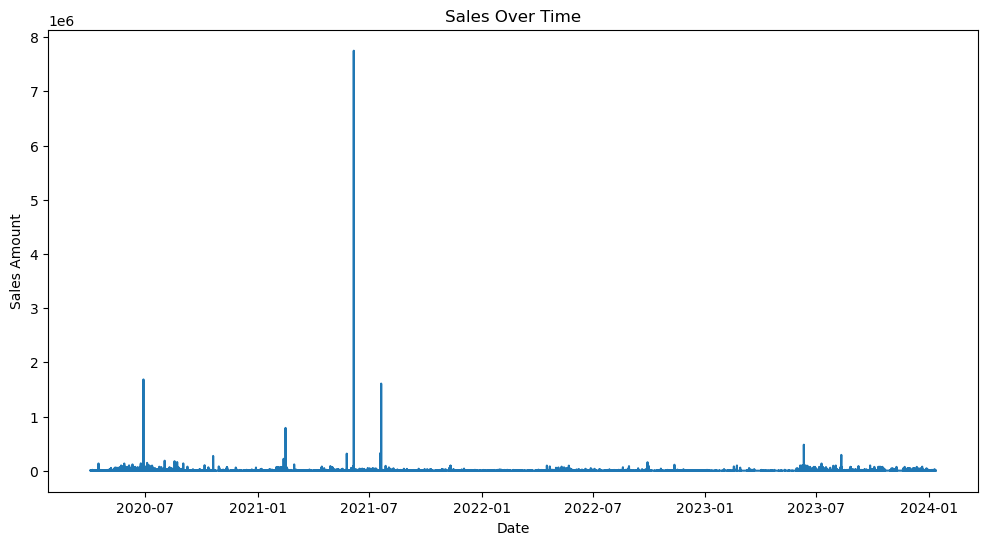

/var/folders/3y/yxfc9cms7ss262pddd2ymh_40000gp/T/ipykernel_91972/873972203.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm')


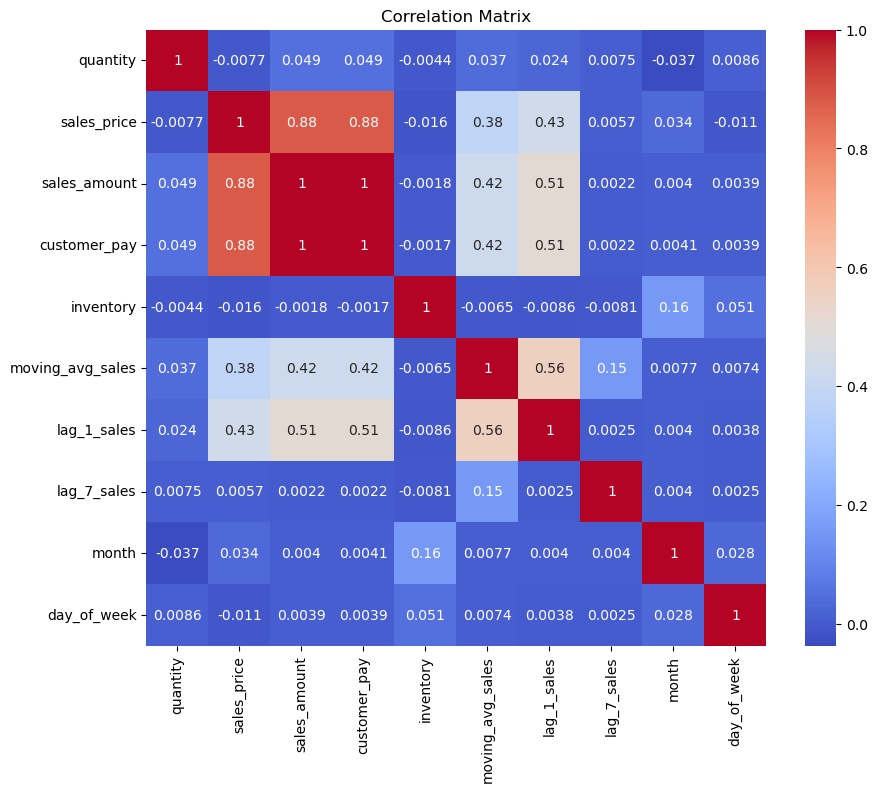

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sales over time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['sales_amount'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [104]:
# threshold = 1e6  # Define the threshold based on your knowledge of the data
# data_without_outliers = filtered_data[filtered_data['sales_amount'] < threshold]

NameError: name 'filtered_data' is not defined

In [21]:
threshold = 9e4  # Define the threshold based on your knowledge of the data
data_without_outliers = merged_data[merged_data['sales_amount'] < threshold]

In [22]:
# Aggregate sales data by week
weekly_sales = data_without_outliers.resample('W-Mon', on='date').sum().reset_index().sort_values(by='date')
# Re-apply ARIMA to weekly data

/var/folders/3y/yxfc9cms7ss262pddd2ymh_40000gp/T/ipykernel_91972/160811963.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_sales = data_without_outliers.resample('W-Mon', on='date').sum().reset_index().sort_values(by='date')


In [23]:
threshold

90000.0

In [24]:
weekly_sales

,date,quantity,sales_price,sales_amount,customer_pay,inventory,moving_avg_sales,lag_1_sales,lag_7_sales,month,day_of_week
0,2020-04-06 00:00:00+00:00,1277,316516.0,429954.0,426302.0,140441.0,4.317770e+05,432200.0,432096.0,1920,1154
1,2020-04-13 00:00:00+00:00,4802,871337.0,1052569.0,1052569.0,649515.0,1.051819e+06,1052723.0,1051191.0,12284,10238
2,2020-04-20 00:00:00+00:00,7126,1267192.0,1784350.0,1784350.0,717942.0,1.897566e+06,1916550.0,1911563.0,14280,9955
3,2020-04-27 00:00:00+00:00,1929,710042.0,827848.0,827848.0,526435.0,8.297123e+05,828290.0,833722.0,4728,2350
4,2020-05-04 00:00:00+00:00,610,279047.0,344333.0,344333.0,75836.0,3.427883e+05,343481.0,341422.0,1855,1122
...,...,...,...,...,...,...,...,...,...,...,...
193,2023-12-18 00:00:00+00:00,1555,2077115.0,2639474.0,2639474.0,3161.0,2.634582e+06,2638214.0,2627669.0,9120,2074
194,2023-12-25 00:00:00+00:00,820,991164.0,1268945.0,1268945.0,996.0,1.274707e+06,1270695.0,1282567.0,4992,1015
195,2024-01-01 00:00:00+00:00,1014,1653545.0,2069871.0,2069871.0,11085.0,2.062878e+06,2068021.0,2049027.0,6027,1457
196,2024-01-08 00:00:00+00:00,619,632474.0,838655.0,838655.0,8892.0,8.345990e+05,839497.0,829474.0,285,1046


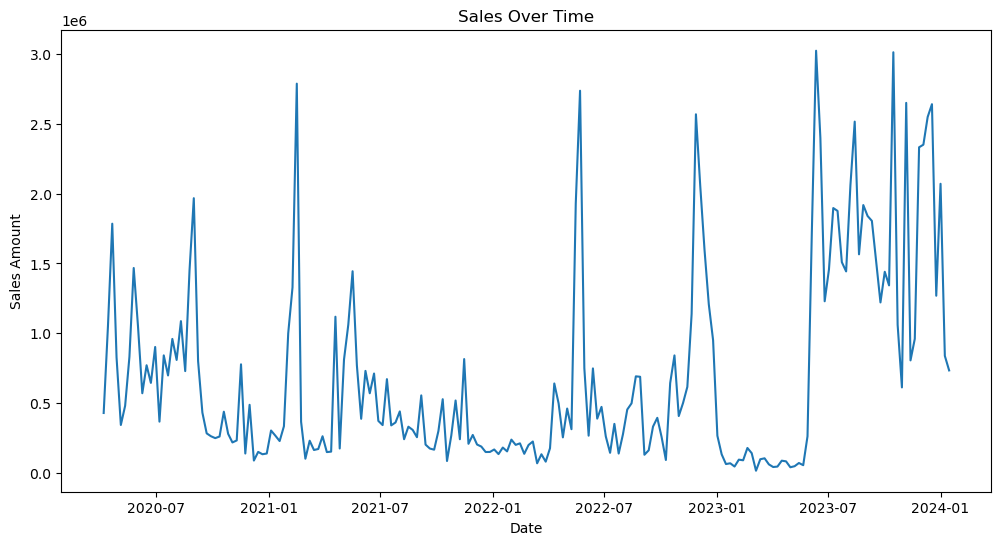

/var/folders/3y/yxfc9cms7ss262pddd2ymh_40000gp/T/ipykernel_91972/1493670307.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm')


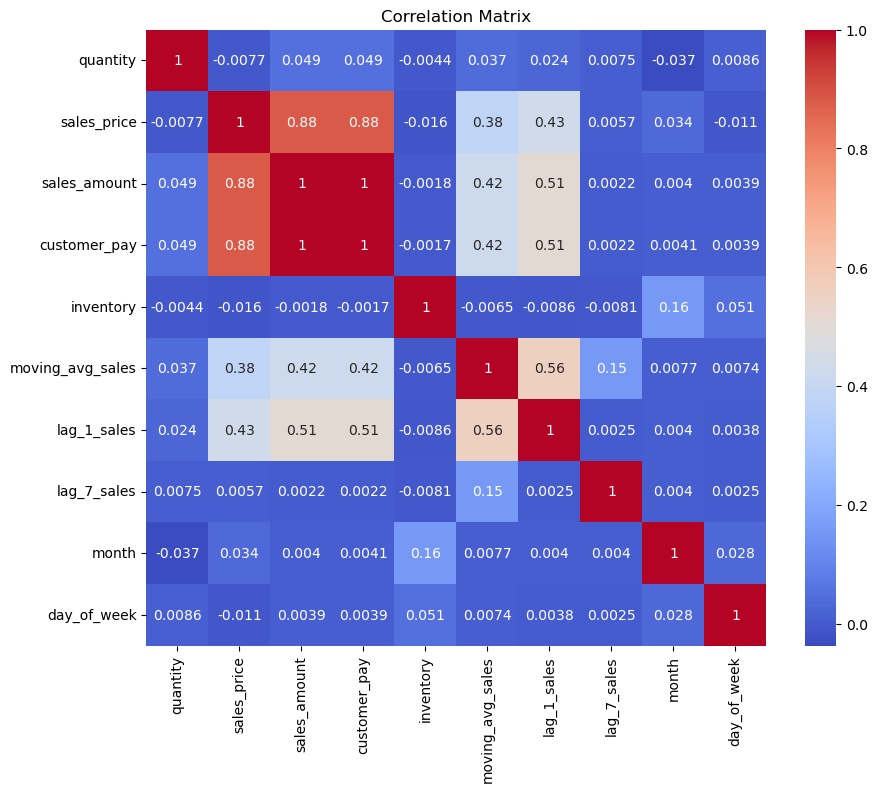

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sales over time
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['date'], weekly_sales['sales_amount'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### ARIMA

In [106]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [107]:
arima_data = weekly_sales[['date', 'sales_amount']].set_index('date').sort_index()

In [108]:
# Split the data into training and testing sets
train_size = int(len(arima_data) * 0.8)
train, test = arima_data[:train_size], arima_data[train_size:]

In [109]:
# Train the ARIMA model on the training data
model = ARIMA(train, order=(0, 2, 0))  # Example order (p=5, d=1, q=0)
model_fit = model.fit()

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [110]:
# Make predictions on the test data
forecast_steps = len(test)
predictions = model_fit.forecast(steps=forecast_steps)

In [113]:
# Evaluate the model
actual = test['sales_amount']
arima_mae = mean_absolute_error(actual, predictions)
arima_rmse = np.sqrt(mean_squared_error(actual, predictions))
arima_mse = mean_squared_error(actual, predictions)
arima_mape = np.mean(np.abs((actual - predictions) / actual)) * 100

print(f"Mean Absolute Error (MAE): {arima_mae}")
print(f"Root Mean Squared Error (RMSE): {arima_rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {arima_mape}%")

Mean Absolute Error (MAE): 1348464.175
Root Mean Squared Error (RMSE): 1592081.7961332498
Mean Absolute Percentage Error (MAPE): 81.4211411407204%


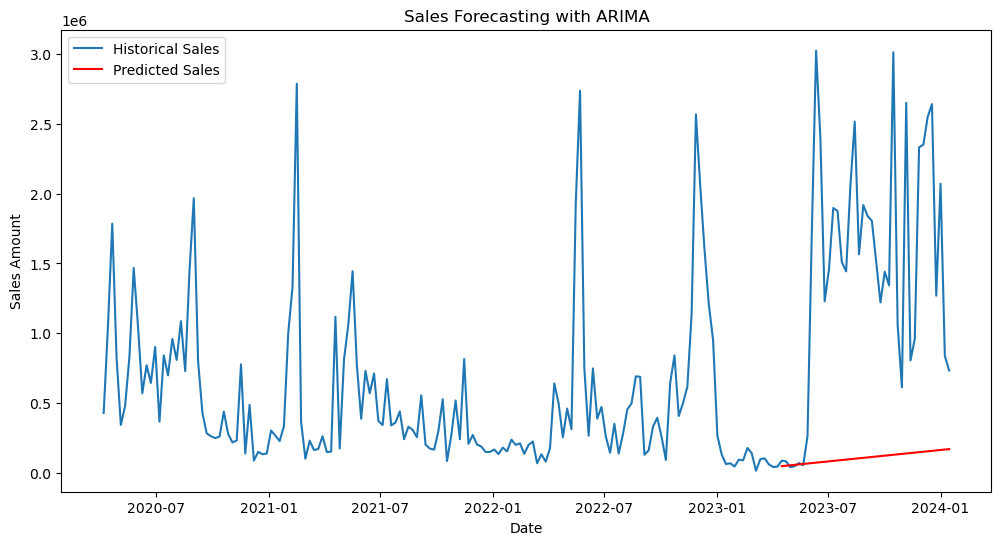

In [56]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(arima_data, label='Historical Sales')
plt.plot(test.index, predictions, label='Predicted Sales', color='red')
plt.title('Sales Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


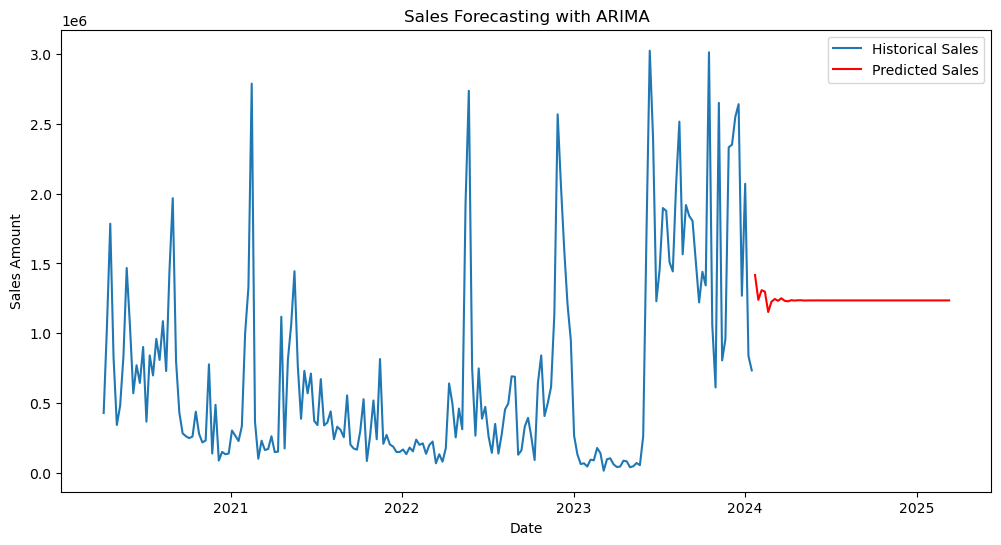

In [57]:
# Prepare the data for ARIMA
# We need to set the date column as the index and sort by date
arima_data = weekly_sales[['date', 'sales_amount']].set_index('date').sort_index()

# Train an ARIMA model
model = ARIMA(arima_data, order=(5, 1, 0))  # Example order (p=5, d=1, q=0)
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=60)  # Forecast for the next 60 days

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(arima_data, label='Historical Sales')
plt.plot(predictions, label='Predicted Sales', color='red')
plt.title('Sales Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

In [58]:
from prophet import Prophet

# Prepare the data for Prophet
prophet_data = weekly_sales[['date', 'sales_amount']].rename(columns={'date': 'ds', 'sales_amount': 'y'})

In [59]:
prophet_data

,ds,y
0,2020-04-06 00:00:00+00:00,429954.0
1,2020-04-13 00:00:00+00:00,1052569.0
2,2020-04-20 00:00:00+00:00,1784350.0
3,2020-04-27 00:00:00+00:00,827848.0
4,2020-05-04 00:00:00+00:00,344333.0
...,...,...
193,2023-12-18 00:00:00+00:00,2639474.0
194,2023-12-25 00:00:00+00:00,1268945.0
195,2024-01-01 00:00:00+00:00,2069871.0
196,2024-01-08 00:00:00+00:00,838655.0


In [60]:
prophet_data['ds'] = prophet_data['ds'].dt.strftime('%Y-%m-%d')

In [61]:
prophet_data

,ds,y
0,2020-04-06,429954.0
1,2020-04-13,1052569.0
2,2020-04-20,1784350.0
3,2020-04-27,827848.0
4,2020-05-04,344333.0
...,...,...
193,2023-12-18,2639474.0
194,2023-12-25,1268945.0
195,2024-01-01,2069871.0
196,2024-01-08,838655.0


18:26:32 - cmdstanpy - INFO - Chain [1] start processing
18:26:32 - cmdstanpy - INFO - Chain [1] done processing


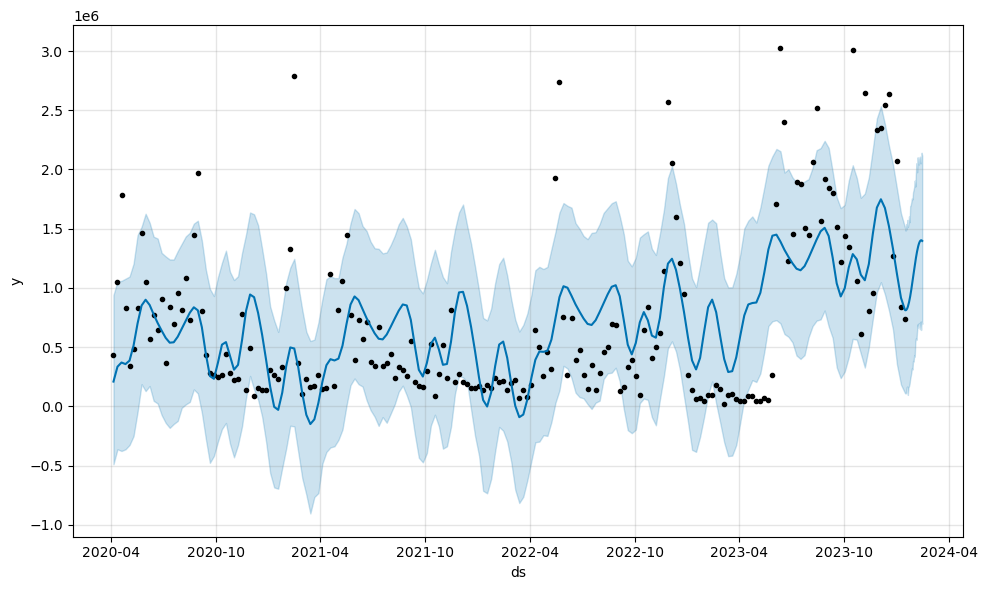

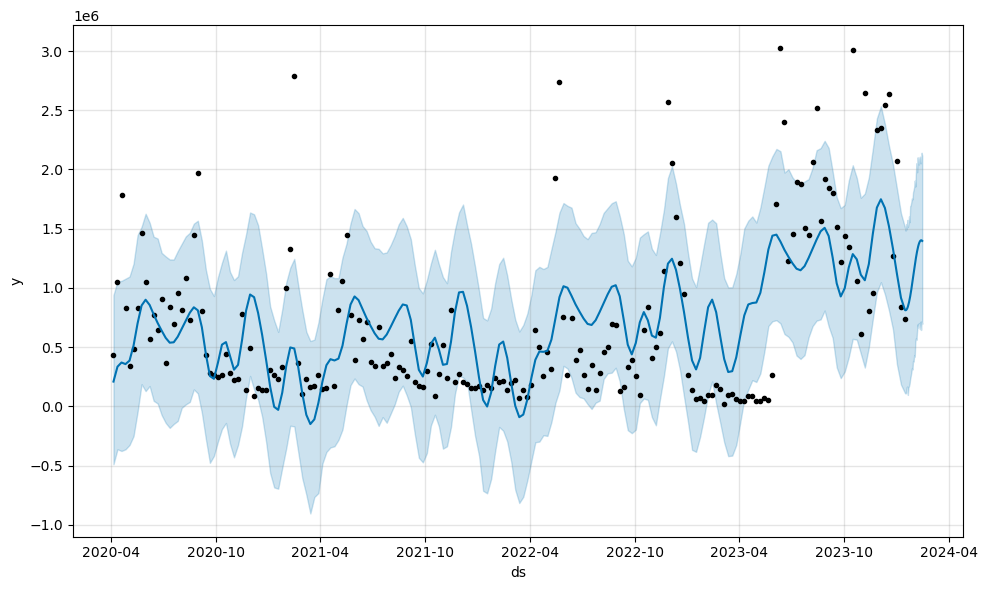

In [62]:

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Make future predictions
future = model.make_future_dataframe(periods=30)  # Predict 30 days into the future
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)

In [63]:
# Show the forecast for the next 5 days
forecast_next_30_days = forecast.tail(30)
print(forecast_next_30_days[["ds", "yhat"]])

            ds          yhat
198 2024-01-16  8.110207e+05
199 2024-01-17  8.131308e+05
200 2024-01-18  8.189948e+05
201 2024-01-19  8.285912e+05
202 2024-01-20  8.418424e+05
203 2024-01-21  8.586150e+05
204 2024-01-22  8.787195e+05
205 2024-01-23  9.019134e+05
206 2024-01-24  9.279034e+05
207 2024-01-25  9.563501e+05
208 2024-01-26  9.868732e+05
209 2024-01-27  1.019058e+06
210 2024-01-28  1.052460e+06
211 2024-01-29  1.086617e+06
212 2024-01-30  1.121053e+06
213 2024-01-31  1.155286e+06
214 2024-02-01  1.188841e+06
215 2024-02-02  1.221252e+06
216 2024-02-03  1.252074e+06
217 2024-02-04  1.280889e+06
218 2024-02-05  1.307312e+06
219 2024-02-06  1.330998e+06
220 2024-02-07  1.351647e+06
221 2024-02-08  1.369007e+06
222 2024-02-09  1.382877e+06
223 2024-02-10  1.393112e+06
224 2024-02-11  1.399619e+06
225 2024-02-12  1.402362e+06
226 2024-02-13  1.401358e+06
227 2024-02-14  1.396673e+06


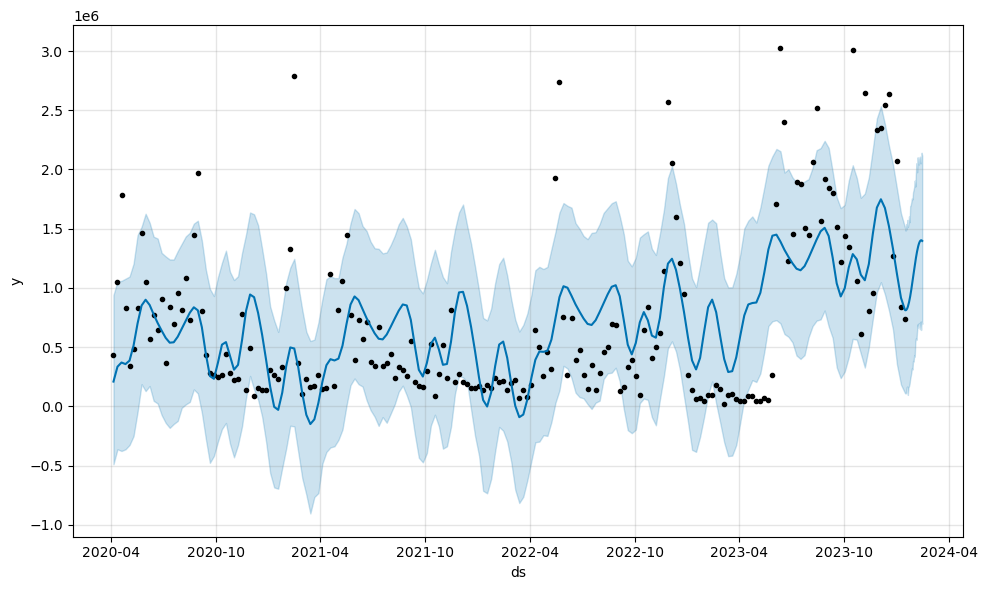

In [64]:
fig1 = model.plot(forecast)

#### For Model Evaluation

In [127]:
# n_weeks_test = 7
# cutoff_date = prophet_data['ds'].max() - pd.DateOffset(weeks=n_weeks_test)

# # Split the data into training and testing sets
# train = prophet_data[prophet_data['ds'] <= cutoff_date]
# test = prophet_data[prophet_data['ds'] > cutoff_date]

In [65]:
# Split the data into training and testing sets
train_size = int(len(prophet_data) * 0.8)
train = prophet_data[:train_size]
test = prophet_data[train_size:]

In [66]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(train)

18:26:44 - cmdstanpy - INFO - Chain [1] start processing
18:26:44 - cmdstanpy - INFO - Chain [1] done processing


In [67]:
# Create a dataframe for future dates to forecast
future = model.make_future_dataframe(periods=(len(test)))  # Forecast for the test set period

# Create a dataframe for future dates to forecast, using weekly frequency
# future_dates = pd.date_range(periods=len(test),
#                              freq='W')
# future = pd.DataFrame({'ds': future_dates})

# Make predictions
forecast = model.predict(future)

# Extract the forecasted values and dates for the test period
forecasted_values = forecast[['ds', 'yhat']].iloc[train_size:].set_index('ds')
actual_values = test.set_index('ds')['y']


In [68]:
forecasted_values

,yhat
ds,
2023-04-11,4.346090e+05
2023-04-12,4.542773e+05
2023-04-13,4.711729e+05
2023-04-14,4.851910e+05
2023-04-15,4.963036e+05
2023-04-16,5.045621e+05
2023-04-17,5.100984e+05
2023-04-18,5.131227e+05
2023-04-19,5.139205e+05


In [69]:
index_values = forecasted_values.index

In [70]:
forecast_value_reset = forecasted_values.reset_index()

In [71]:
# Calculate evaluation metrics
prophet_mae = mean_absolute_error(actual_values, forecasted_values['yhat'])
prophet_rmse = np.sqrt(mean_squared_error(actual_values, forecasted_values['yhat']))
prophet_mape = np.mean(np.abs((actual_values - forecasted_values['yhat']) / actual_values)) * 100

print(f"Mean Absolute Error (MAE): {prophet_mae}")
print(f"Root Mean Squared Error (RMSE): {prophet_rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {prophet_mape}%")


Mean Absolute Error (MAE): 982560.1777797323
Root Mean Squared Error (RMSE): 1171537.0537204721
Mean Absolute Percentage Error (MAPE): nan%


In [99]:
# Calculate MAPE with a check to avoid division by zero
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0  # Mask to avoid division by zero
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Calculate evaluation metrics
prophet_mae = mean_absolute_error(actual_values, forecasted_values['yhat'])
prophet_rmse = np.sqrt(mean_squared_error(actual_values, forecasted_values['yhat']))
prophet_mape = mean_absolute_percentage_error(actual_values, forecasted_values['yhat'])

print(f"Mean Absolute Error (MAE): {prophet_mae}")
print(f"Root Mean Squared Error (RMSE): {prophet_rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {prophet_mape}%")

Mean Absolute Error (MAE): 982560.1777797323
Root Mean Squared Error (RMSE): 1171537.0537204721
Mean Absolute Percentage Error (MAPE): 153.1966423487639%


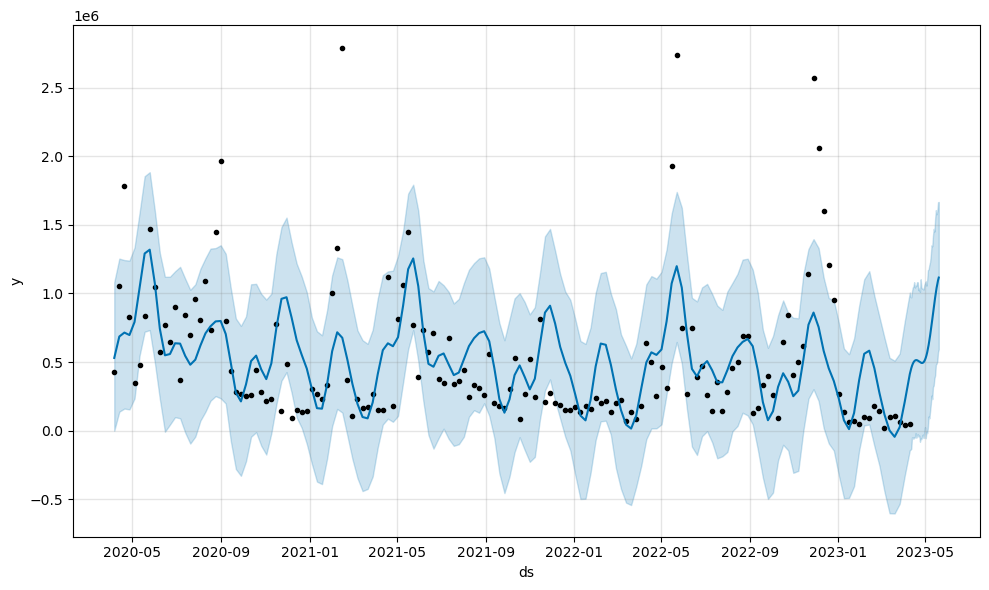

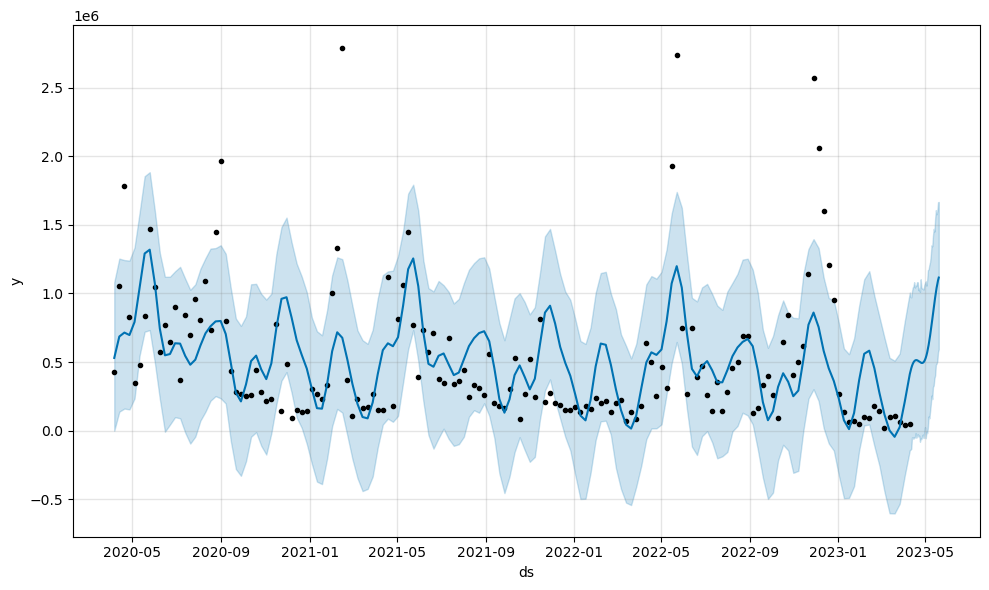

In [73]:
model.plot(forecast)

In [74]:
prophet_data

,ds,y
0,2020-04-06,429954.0
1,2020-04-13,1052569.0
2,2020-04-20,1784350.0
3,2020-04-27,827848.0
4,2020-05-04,344333.0
...,...,...
193,2023-12-18,2639474.0
194,2023-12-25,1268945.0
195,2024-01-01,2069871.0
196,2024-01-08,838655.0


In [75]:
forecast_value_reset['ds'].max()

Timestamp('2023-05-20 00:00:00')

In [76]:
# Ensure 'ds' is set as the index and is a datetime object
forecast_value_reset['ds'] = pd.to_datetime(forecast_value_reset['ds'])
forecast_value_reset.set_index('ds', inplace=True)

In [77]:
weekly_forecast = forecast_value_reset.resample('W').agg({'yhat': 'sum'})

In [78]:
index_values = weekly_forecast.index

In [79]:
weekly_forecast_reset = weekly_forecast.reset_index()

In [80]:
weekly_forecast_reset

,ds,yhat
0,2023-04-16,2.846116e+06
1,2023-04-23,3.569893e+06
2,2023-04-30,3.479262e+06
3,2023-05-07,4.042134e+06
4,2023-05-14,5.672655e+06
5,2023-05-21,6.299948e+06


In [81]:
prophet_data['ds']

0      2020-04-06
1      2020-04-13
2      2020-04-20
3      2020-04-27
4      2020-05-04
          ...    
193    2023-12-18
194    2023-12-25
195    2024-01-01
196    2024-01-08
197    2024-01-15
Name: ds, Length: 198, dtype: object

In [82]:
forecast['ds']

0     2020-04-06
1     2020-04-13
2     2020-04-20
3     2020-04-27
4     2020-05-04
         ...    
193   2023-05-16
194   2023-05-17
195   2023-05-18
196   2023-05-19
197   2023-05-20
Name: ds, Length: 198, dtype: datetime64[ns]

In [83]:
forecast_historical

NameError: name 'forecast_historical' is not defined

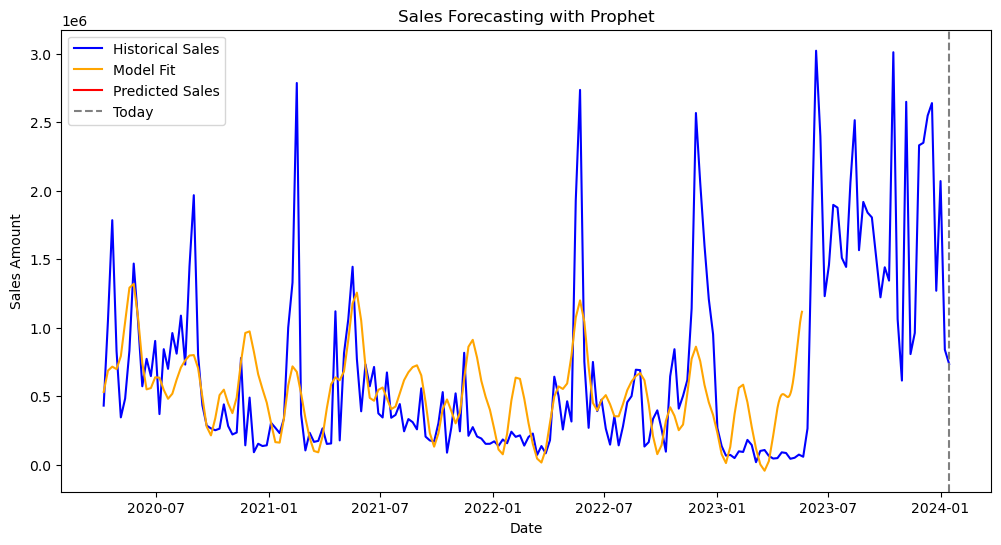

In [84]:
# Ensure 'ds' is a datetime object
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Split the forecast into historical and future predictions
forecast_historical = forecast[forecast['ds'] <= prophet_data['ds'].max()]
forecast_future = weekly_forecast_reset[weekly_forecast_reset['ds'] > prophet_data['ds'].max()]

# Plot the historical data
plt.figure(figsize=(12, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Historical Sales', color='blue')

# Plot the model's fit on historical data
plt.plot(forecast_historical['ds'], forecast_historical['yhat'], label='Model Fit', color='orange')

# Plot the forecasted future values
plt.plot(forecast_future['ds'], forecast_future['yhat'], label='Predicted Sales', color='red')

# Customize the plot
plt.title('Sales Forecasting with Prophet')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.axvline(x=prophet_data['ds'].max(), color='grey', linestyle='--', label='Today')
plt.legend()
plt.show()

In [101]:
arima_mape

81.4211411407204

In [102]:
prophet_mape

153.1966423487639

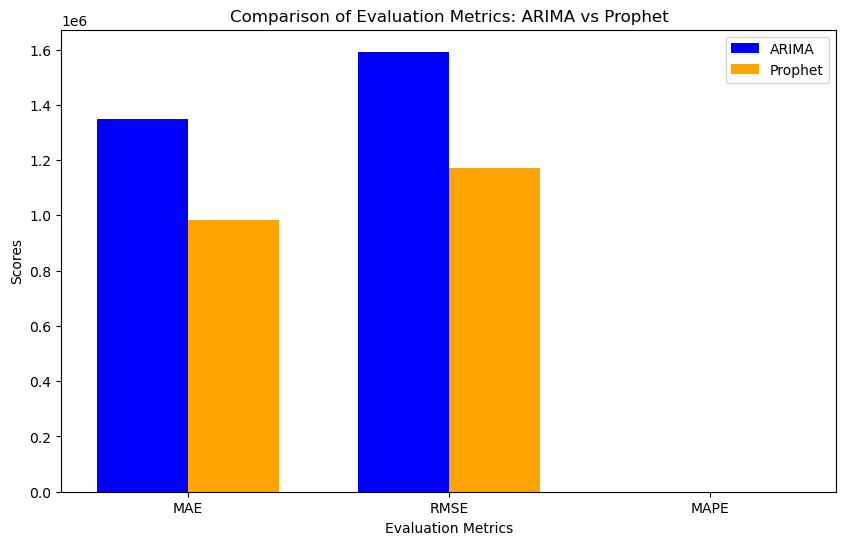

In [100]:
import matplotlib.pyplot as plt

# Example evaluation metrics for ARIMA and Prophet models
metrics = ['MAE', 'RMSE', 'MAPE']
arima_metrics = [arima_mae, arima_rmse, arima_mape]  # Replace with actual ARIMA values
prophet_metrics = [prophet_mae, prophet_rmse, prophet_mape]  # Replace with actual Prophet values

# Set up the bar width
bar_width = 0.35
index = np.arange(len(metrics))

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(index, arima_metrics, bar_width, label='ARIMA', color='blue')
plt.bar(index + bar_width, prophet_metrics, bar_width, label='Prophet', color='orange')

# Add labels, title, and legend
plt.xlabel('Evaluation Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Evaluation Metrics: ARIMA vs Prophet')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()

# Display the chart
plt.show()

### Inventory based on sales

In [85]:
# Remove rows with missing inventory
filtered_data = merged_data.dropna(subset=['inventory'])

# Verify the removal
print(filtered_data.isnull().sum())

_id_x                   0
product_id              0
product_name            0
url_key                 0
variant_id              0
quantity                0
sales_price             0
sales_amount            0
customer_pay            0
cart_id                 0
customer_id         10667
added_at                0
user_id              5521
_id_y                   0
inventory               0
name                    0
brand                   0
category                5
date                    0
moving_avg_sales        0
lag_1_sales             0
lag_7_sales             0
month                   0
day_of_week             0
dtype: int64


In [86]:
# Example: Set reorder point based on the mean of sales amount
reorder_point = filtered_data['sales_amount'].mean()

In [87]:
reorder_point

1744.790107333796

In [88]:
# Identify potential understock situations
filtered_data['potential_understock'] = filtered_data['inventory'] < reorder_point

# Define a threshold for overstock (e.g., 50% more than the reorder point)
overstock_threshold = reorder_point * 1.5

# Identify potential overstock situations
filtered_data['potential_overstock'] = filtered_data['inventory'] > overstock_threshold

# Review the results
print(filtered_data[['product_id', 'inventory', 'sales_amount', 'potential_understock', 'potential_overstock']].head())


                  product_id  inventory  sales_amount  potential_understock  \
7   5e8631efe463693ae6692884       13.0        2800.0                  True   
8   5e86aee3e463693ae6692dba     1313.0         188.0                  True   
9   5e85c1a7df1c8d368345795c       37.0        2600.0                  True   
10  5e862fa6e463693ae6692821       12.0        2800.0                  True   
11  5e863862e463693ae669295c       12.0        2500.0                  True   

    potential_overstock  
7                 False  
8                 False  
9                 False  
10                False  
11                False  


/var/folders/3y/yxfc9cms7ss262pddd2ymh_40000gp/T/ipykernel_91972/2903147084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['potential_understock'] = filtered_data['inventory'] < reorder_point
/var/folders/3y/yxfc9cms7ss262pddd2ymh_40000gp/T/ipykernel_91972/2903147084.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['potential_overstock'] = filtered_data['inventory'] > overstock_threshold


In [89]:
filtered_data

,_id_x,product_id,product_name,url_key,variant_id,quantity,sales_price,sales_amount,customer_pay,cart_id,...,brand,category,date,moving_avg_sales,lag_1_sales,lag_7_sales,month,day_of_week,potential_understock,potential_overstock
7,5e86c9abe463693ae6692fa1,5e8631efe463693ae6692884,Gold Package -Package,gold-package-package,5e8631efe463693ae6692887,1,2800.0,2800.0,2800.0,5e86c9abe463693ae6692fa0,...,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 05:29:15.751000+00:00,835.000000,2500.0,160.0,4,4,True,False
8,5e86cdf9e463693ae6692fdb,5e86aee3e463693ae6692dba,Butter Delight 160gm,butter-delight-160gm,5e86aee3e463693ae6692dbd,4,47.0,188.0,47.0,5e86c9abe463693ae6692fa0,...,5e85d9bbf6f6d43a172e2d8d,5e85598cdf1c8d36834577d2,2020-04-03 05:47:37.949000+00:00,825.428571,2800.0,255.0,4,4,True,False
9,5e86e53b2dac52448520e9c0,5e85c1a7df1c8d368345795c,Basic pack - Package A,basic-pack-package-a,5e85c1a7df1c8d368345795f,1,2600.0,2600.0,2600.0,5e86e53b2dac52448520e9bf,...,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 07:26:51.084000+00:00,1182.142857,188.0,103.0,4,4,True,False
10,5e86e5af2dac52448520e9df,5e862fa6e463693ae6692821,Silver Pack - Package B,silver-pack-package-b,5e862fa6e463693ae6692824,1,2800.0,2800.0,2800.0,5e86b6dde463693ae6692e9f,...,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 07:28:47.107000+00:00,1580.857143,2600.0,9.0,4,4,True,False
11,5e86eda12dac52448520ea31,5e863862e463693ae669295c,Haldiram Package -Package D,haldiram-package-package-d,5e863862e463693ae669295f,1,2500.0,2500.0,2500.0,5e86c9abe463693ae6692fa0,...,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 08:02:41.398000+00:00,1915.142857,2800.0,160.0,4,4,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99111,659a7e14ba0f5705d38a4c55,6038a89b8c67104d74170393,Juxin Easy Spin Cutter,juxin-easy-spin-cutter,618cb54d6bbdf3f86bd1be79,1,799.0,799.0,799.0,659a7e14ba0f5705d38a4c54,...,6038d15044eb0c4d7b6dbd4b,620e06fb4b0c05190ffcaaff,2024-01-07 10:33:56.583000+00:00,3132.000000,950.0,9235.0,1,6,True,False
99140,659b755da97dd105d24c4cb4,646af6958e441e21df2b5a6a,KTM CTY Unisex Polar Fleece Jacket (KUPFJ32301),ktm-cty-unisex-polar-fleece-jacket-kupfj32301,646af6958e441e21df2b5a8e,1,690.0,690.0,690.0,659b755da97dd105d24c4cb3,...,5e6882a27f1e0a4da1c072b6,5f6b42d4ea2ed65dbf174fc3,2024-01-08 04:09:01.440000+00:00,734.142857,2199.0,450.0,1,0,True,False
99190,659cd707aadf111f2b4db139,659e45c4aadf111f2b4dba8f,Gravity AIRSHOT 250 Slate Grey True Wireless G...,gravity-airshot-250-slate-grey-true-wireless-g...,63312ab70f2834d620112aa3,10,2699.0,26990.0,26990.0,659cd706aadf111f2b4db138,...,5e2aa5e3bc8d203bec624d50,5e69c5b62a050309e11d88f8,2024-01-09 05:17:59.162000+00:00,7131.428571,575.0,4374.0,1,1,True,False
99253,659e07473360d61f2590e304,659fccfb3aad59282aa5bd4f,Hilife Instant Oats Pouch c,hilife-instant-oats-pouch-c,622dd7f98c42715f724eda10,1,330.0,330.0,330.0,659c13993360d61f2590dd7d,...,5ecccdd699cd7f11130d7286,61f6774475f6a6d0dc358143,2024-01-10 02:56:07.203000+00:00,1847.142857,2100.0,2100.0,1,2,True,False


In [90]:
filtered_data['inventory'] < reorder_point

7        True
8        True
9        True
10       True
11       True
         ... 
99111    True
99140    True
99190    True
99253    True
99275    True
Name: inventory, Length: 24503, dtype: bool

In [91]:
# Identify potential understock situations
filtered_data['potential_understock'] = filtered_data['inventory'] < reorder_point

# Filter understock products
understock_products = filtered_data[filtered_data['potential_understock']]

# Sort understock products by the degree of understock (e.g., reorder point - inventory)
# understock_products = understock_products.sort_values(by='reorder_point', ascending=False)

# Get the top 10 understock products
top_10_understock = understock_products.head(10)

print("Top 10 Potential Understock Products:")
print(top_10_understock[['product_id', 'inventory', 'sales_amount', 'potential_understock']])


Top 10 Potential Understock Products:
                  product_id  inventory  sales_amount  potential_understock
7   5e8631efe463693ae6692884       13.0        2800.0                  True
8   5e86aee3e463693ae6692dba     1313.0         188.0                  True
9   5e85c1a7df1c8d368345795c       37.0        2600.0                  True
10  5e862fa6e463693ae6692821       12.0        2800.0                  True
11  5e863862e463693ae669295c       12.0        2500.0                  True
12  5e862fa6e463693ae6692821       12.0        2800.0                  True
13  5e85ed8fe463693ae6691efa       29.0         464.0                  True
14  5e8615d6e463693ae6692282     1396.0          46.0                  True
15  5e8612dae463693ae6692214      464.0         160.0                  True
16  5e85c1a7df1c8d368345795c       37.0        2600.0                  True


/var/folders/3y/yxfc9cms7ss262pddd2ymh_40000gp/T/ipykernel_91972/2029172682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['potential_understock'] = filtered_data['inventory'] < reorder_point


In [92]:
top_10_understock

,_id_x,product_id,product_name,url_key,variant_id,quantity,sales_price,sales_amount,customer_pay,cart_id,...,brand,category,date,moving_avg_sales,lag_1_sales,lag_7_sales,month,day_of_week,potential_understock,potential_overstock
7,5e86c9abe463693ae6692fa1,5e8631efe463693ae6692884,Gold Package -Package,gold-package-package,5e8631efe463693ae6692887,1,2800.0,2800.0,2800.0,5e86c9abe463693ae6692fa0,...,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 05:29:15.751000+00:00,835.000000,2500.0,160.0,4,4,True,False
8,5e86cdf9e463693ae6692fdb,5e86aee3e463693ae6692dba,Butter Delight 160gm,butter-delight-160gm,5e86aee3e463693ae6692dbd,4,47.0,188.0,47.0,5e86c9abe463693ae6692fa0,...,5e85d9bbf6f6d43a172e2d8d,5e85598cdf1c8d36834577d2,2020-04-03 05:47:37.949000+00:00,825.428571,2800.0,255.0,4,4,True,False
9,5e86e53b2dac52448520e9c0,5e85c1a7df1c8d368345795c,Basic pack - Package A,basic-pack-package-a,5e85c1a7df1c8d368345795f,1,2600.0,2600.0,2600.0,5e86e53b2dac52448520e9bf,...,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 07:26:51.084000+00:00,1182.142857,188.0,103.0,4,4,True,False
10,5e86e5af2dac52448520e9df,5e862fa6e463693ae6692821,Silver Pack - Package B,silver-pack-package-b,5e862fa6e463693ae6692824,1,2800.0,2800.0,2800.0,5e86b6dde463693ae6692e9f,...,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 07:28:47.107000+00:00,1580.857143,2600.0,9.0,4,4,True,False
11,5e86eda12dac52448520ea31,5e863862e463693ae669295c,Haldiram Package -Package D,haldiram-package-package-d,5e863862e463693ae669295f,1,2500.0,2500.0,2500.0,5e86c9abe463693ae6692fa0,...,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 08:02:41.398000+00:00,1915.142857,2800.0,160.0,4,4,True,False
12,5e86edd72dac52448520ea34,5e862fa6e463693ae6692821,Silver Pack - Package B,silver-pack-package-b,5e862fa6e463693ae6692824,1,2800.0,2800.0,2800.0,5e86c9abe463693ae6692fa0,...,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 08:03:35.604000+00:00,2312.571429,2500.0,18.0,4,4,True,False
13,5e86f5c72dac52448520eae6,5e85ed8fe463693ae6691efa,BHUJIYA MASALA/PLAIN 1000 gram,bhujiya-masala-plain-1000-gram,5e86b136e463693ae6692e1e,1,464.0,464.0,464.0,5e86f5c72dac52448520eae5,...,5e85d999f6f6d43a172e2d8c,5e85598cdf1c8d36834577d2,2020-04-03 08:37:27.350000+00:00,2021.714286,2800.0,2500.0,4,4,True,False
14,5e86f5f52dac52448520eaf9,5e8615d6e463693ae6692282,Cheese Cracker 100gm,cheese-cracker-100gm,5e8615d6e463693ae6692285,2,23.0,46.0,46.0,5e86f5c72dac52448520eae5,...,5e85d9bbf6f6d43a172e2d8d,5e85598cdf1c8d36834577d2,2020-04-03 08:38:13.232000+00:00,1628.285714,464.0,2800.0,4,4,True,False
15,5e86f65c2dac52448520eb14,5e8612dae463693ae6692214,Mass Dal 1000g,mass-dal-1000g,5e8612dae463693ae6692217,1,160.0,160.0,160.0,5f0c95c9ec3f45130ce2d63e,...,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 08:39:56.142000+00:00,1624.285714,46.0,188.0,4,4,True,False
16,5e86f66e2dac52448520eb18,5e85c1a7df1c8d368345795c,Basic pack - Package A,basic-pack-package-a,5e85c1a7df1c8d368345795f,1,2600.0,2600.0,2600.0,5f0c95c9ec3f45130ce2d63e,...,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 08:40:14.016000+00:00,1624.285714,160.0,2600.0,4,4,True,False


In [93]:
# Get the top 10 understock products
# Filter overstock products
overstock_products = filtered_data[filtered_data['potential_overstock']]

In [94]:
overstock_products.head(10)

,_id_x,product_id,product_name,url_key,variant_id,quantity,sales_price,sales_amount,customer_pay,cart_id,...,brand,category,date,moving_avg_sales,lag_1_sales,lag_7_sales,month,day_of_week,potential_understock,potential_overstock
250,5e8ae779ae3d8758f0fb2b5b,5e87025a2dac52448520ed12,CLEAN AID DISHWASH BAR 300GM,clean-aid-dishwash-bar-300gm,5e87025a2dac52448520ed15,2,40.0,80.0,80.0,5e8ae66dae3d8758f0fb2b36,...,5e86f5f32dac52448520eaf8,5e855a8adf1c8d36834577e9,2020-04-06 08:25:29.852000+00:00,159.428571,27.0,102.0,4,0,False,True
263,5e8aeb7bae3d8758f0fb2c0b,5e8700ff2dac52448520ecdb,Clean Aid Dishwash Bar 90gm,clean-aid-dishwash-bar-90gm,5e8700ff2dac52448520ecde,10,84.0,840.0,840.0,5e8ae970ae3d8758f0fb2baf,...,5e86f5f32dac52448520eaf8,5e855a8adf1c8d36834577e9,2020-04-06 08:42:35.492000+00:00,3468.571429,900.0,190.0,4,0,False,True
314,5e8af796ac1b3c5e810fd243,5e8700ff2dac52448520ecdb,Clean Aid Dishwash Bar 90gm,clean-aid-dishwash-bar-90gm,5e8700ff2dac52448520ecde,1,84.0,84.0,84.0,5e8af3e1ac1b3c5e810fd1e0,...,5e86f5f32dac52448520eaf8,5e855a8adf1c8d36834577e9,2020-04-06 09:34:14.071000+00:00,181.142857,580.0,130.0,4,0,False,True
484,5e8b62fdb4b5e061c85b1c96,5e8700ff2dac52448520ecdb,Clean Aid Dishwash Bar 90gm,clean-aid-dishwash-bar-90gm,5e8700ff2dac52448520ecde,1,84.0,84.0,84.0,5e8b61e6b4b5e061c85b1c58,...,5e86f5f32dac52448520eaf8,5e855a8adf1c8d36834577e9,2020-04-06 17:12:29.897000+00:00,131.857143,151.0,172.0,4,0,False,True
488,5e8be6fbb4b5e061c85b1ebb,5e8b3711b4b5e061c85b1885,Dummy product Rs 1001,dummy-product-rs-1001,5e8b3711b4b5e061c85b188a,1,1001.0,1001.0,1001.0,5e89d5f7111e30574a908722,...,5e3a67254ae64f55f77499fc,5e68b3a87f1e0a4da1c077f1,2020-04-07 02:35:39.450000+00:00,487.142857,1650.0,94.0,4,1,False,True
490,5e8be865b4b5e061c85b1eea,5e8b3711b4b5e061c85b1885,Dummy product Rs 1001,dummy-product-rs-1001,5e8b3711b4b5e061c85b188c,1,1001.0,1001.0,1001.0,5e88b320d74a804c152399a0,...,5e3a67254ae64f55f77499fc,5e68b3a87f1e0a4da1c077f1,2020-04-07 02:41:41.697000+00:00,623.285714,203.0,151.0,4,1,False,True
587,5e8c56f4cd9f77682d570a9c,5e8700ff2dac52448520ecdb,Clean Aid Dishwash Bar 90gm,clean-aid-dishwash-bar-90gm,5e8700ff2dac52448520ecde,3,84.0,252.0,252.0,5e8c56f4cd9f77682d570a9b,...,5e86f5f32dac52448520eaf8,5e855a8adf1c8d36834577e9,2020-04-07 10:33:24.116000+00:00,252.285714,228.0,38.0,4,1,False,True
629,5e8c83885da5a169ff1d66a4,5e8b3711b4b5e061c85b1885,Dummy product Rs 1005,dummy-product-rs-1005,5e8b3711b4b5e061c85b1888,1,1010.0,1010.0,1010.0,5e8c83885da5a169ff1d66a3,...,5e3a67254ae64f55f77499fc,5e68b3a87f1e0a4da1c077f1,2020-04-07 13:43:36.632000+00:00,345.142857,650.0,2900.0,4,1,False,True
682,5e8d580ade870d6cf1b443ad,5e86290be463693ae6692604,Snakker Big 30pcs x24 gms,snakker-big-30pcs-x24-gms,5e86290be463693ae6692607,1,270.0,270.0,270.0,5e8d55d5de870d6cf1b44326,...,5e85d9bbf6f6d43a172e2d8d,5e85598cdf1c8d36834577d2,2020-04-08 04:50:18.049000+00:00,173.428571,130.0,210.0,4,2,False,True
889,5e8d8555de870d6cf1b44f54,5e8700ff2dac52448520ecdb,Clean Aid Dishwash Bar 90gm,clean-aid-dishwash-bar-90gm,5e8700ff2dac52448520ecde,3,84.0,252.0,252.0,5e8d8366de870d6cf1b44ee8,...,5e86f5f32dac52448520eaf8,5e855a8adf1c8d36834577e9,2020-04-08 08:03:33.099000+00:00,168.857143,165.0,258.0,4,2,False,True


In [95]:
top_10_overstock = overstock_products.head(10)

In [96]:
print("Top 10 Potential Overstock Products:")
print(top_10_overstock[['product_id', 'inventory', 'sales_amount', 'potential_overstock']])

Top 10 Potential Overstock Products:
                   product_id  inventory  sales_amount  potential_overstock
250  5e87025a2dac52448520ed12     4783.0          80.0                 True
263  5e8700ff2dac52448520ecdb     3575.0         840.0                 True
314  5e8700ff2dac52448520ecdb     3575.0          84.0                 True
484  5e8700ff2dac52448520ecdb     3575.0          84.0                 True
488  5e8b3711b4b5e061c85b1885    33333.0        1001.0                 True
490  5e8b3711b4b5e061c85b1885    33333.0        1001.0                 True
587  5e8700ff2dac52448520ecdb     3575.0         252.0                 True
629  5e8b3711b4b5e061c85b1885    33333.0        1010.0                 True
682  5e86290be463693ae6692604     2875.0         270.0                 True
889  5e8700ff2dac52448520ecdb     3575.0         252.0                 True


In [272]:
top_10_understock

,_id_x,product_id,product_name,url_key,variant_id,quantity,sales_price,sales_amount,customer_pay,cart_id,...,brand,category,date,moving_avg_sales,lag_1_sales,lag_7_sales,month,day_of_week,potential_understock,potential_overstock
7,5e86c9abe463693ae6692fa1,5e8631efe463693ae6692884,Gold Package -Package,gold-package-package,5e8631efe463693ae6692887,1,2800.0,2800.0,2800.0,5e86c9abe463693ae6692fa0,...,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 05:29:15.751000+00:00,835.000000,2500.0,160.0,4,4,True,False
8,5e86cdf9e463693ae6692fdb,5e86aee3e463693ae6692dba,Butter Delight 160gm,butter-delight-160gm,5e86aee3e463693ae6692dbd,4,47.0,188.0,47.0,5e86c9abe463693ae6692fa0,...,5e85d9bbf6f6d43a172e2d8d,5e85598cdf1c8d36834577d2,2020-04-03 05:47:37.949000+00:00,825.428571,2800.0,255.0,4,4,True,False
9,5e86e53b2dac52448520e9c0,5e85c1a7df1c8d368345795c,Basic pack - Package A,basic-pack-package-a,5e85c1a7df1c8d368345795f,1,2600.0,2600.0,2600.0,5e86e53b2dac52448520e9bf,...,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 07:26:51.084000+00:00,1182.142857,188.0,103.0,4,4,True,False
10,5e86e5af2dac52448520e9df,5e862fa6e463693ae6692821,Silver Pack - Package B,silver-pack-package-b,5e862fa6e463693ae6692824,1,2800.0,2800.0,2800.0,5e86b6dde463693ae6692e9f,...,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 07:28:47.107000+00:00,1580.857143,2600.0,9.0,4,4,True,False
11,5e86eda12dac52448520ea31,5e863862e463693ae669295c,Haldiram Package -Package D,haldiram-package-package-d,5e863862e463693ae669295f,1,2500.0,2500.0,2500.0,5e86c9abe463693ae6692fa0,...,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 08:02:41.398000+00:00,1915.142857,2800.0,160.0,4,4,True,False
12,5e86edd72dac52448520ea34,5e862fa6e463693ae6692821,Silver Pack - Package B,silver-pack-package-b,5e862fa6e463693ae6692824,1,2800.0,2800.0,2800.0,5e86c9abe463693ae6692fa0,...,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 08:03:35.604000+00:00,2312.571429,2500.0,18.0,4,4,True,False
13,5e86f5c72dac52448520eae6,5e85ed8fe463693ae6691efa,BHUJIYA MASALA/PLAIN 1000 gram,bhujiya-masala-plain-1000-gram,5e86b136e463693ae6692e1e,1,464.0,464.0,464.0,5e86f5c72dac52448520eae5,...,5e85d999f6f6d43a172e2d8c,5e85598cdf1c8d36834577d2,2020-04-03 08:37:27.350000+00:00,2021.714286,2800.0,2500.0,4,4,True,False
14,5e86f5f52dac52448520eaf9,5e8615d6e463693ae6692282,Cheese Cracker 100gm,cheese-cracker-100gm,5e8615d6e463693ae6692285,2,23.0,46.0,46.0,5e86f5c72dac52448520eae5,...,5e85d9bbf6f6d43a172e2d8d,5e85598cdf1c8d36834577d2,2020-04-03 08:38:13.232000+00:00,1628.285714,464.0,2800.0,4,4,True,False
15,5e86f65c2dac52448520eb14,5e8612dae463693ae6692214,Mass Dal 1000g,mass-dal-1000g,5e8612dae463693ae6692217,1,160.0,160.0,160.0,5f0c95c9ec3f45130ce2d63e,...,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 08:39:56.142000+00:00,1624.285714,46.0,188.0,4,4,True,False
16,5e86f66e2dac52448520eb18,5e85c1a7df1c8d368345795c,Basic pack - Package A,basic-pack-package-a,5e85c1a7df1c8d368345795f,1,2600.0,2600.0,2600.0,5f0c95c9ec3f45130ce2d63e,...,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 08:40:14.016000+00:00,1624.285714,160.0,2600.0,4,4,True,False


In [97]:
# Review understock products
print("Understock Products Evaluation:")
print(top_10_understock[['product_id', 'inventory', 'sales_amount']].describe())

# Review overstock products
print("Overstock Products Evaluation:")
print(top_10_overstock[['product_id', 'inventory', 'sales_amount']].describe())

# Calculate potential revenue loss due to understock
understock_revenue_loss = top_10_understock['sales_amount'].sum()
print(f"Potential Revenue Loss due to Understock: ${understock_revenue_loss:.2f}")

# Calculate potential holding costs due to overstock
overstock_holding_costs = top_10_overstock['inventory'].sum()  # Adjust if you have specific holding cost per unit
print(f"Potential Holding Costs due to Overstock: ${overstock_holding_costs:.2f}")


Understock Products Evaluation:
         inventory  sales_amount
count    10.000000     10.000000
mean    332.500000   1695.800000
std     556.446913   1282.834518
min      12.000000     46.000000
25%      12.250000    257.000000
50%      33.000000   2550.000000
75%     357.250000   2750.000000
max    1396.000000   2800.000000
Overstock Products Evaluation:
          inventory  sales_amount
count     10.000000     10.000000
mean   12553.200000    487.400000
std    14346.831642    418.268176
min     2875.000000     80.000000
25%     3575.000000    126.000000
50%     3575.000000    261.000000
75%    26195.500000    960.750000
max    33333.000000   1010.000000
Potential Revenue Loss due to Understock: $16958.00
Potential Holding Costs due to Overstock: $125532.00


In [114]:
filtered_data

,_id_x,product_id,product_name,url_key,variant_id,quantity,sales_price,sales_amount,customer_pay,cart_id,...,brand,category,date,moving_avg_sales,lag_1_sales,lag_7_sales,month,day_of_week,potential_understock,potential_overstock
7,5e86c9abe463693ae6692fa1,5e8631efe463693ae6692884,Gold Package -Package,gold-package-package,5e8631efe463693ae6692887,1,2800.0,2800.0,2800.0,5e86c9abe463693ae6692fa0,...,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 05:29:15.751000+00:00,835.000000,2500.0,160.0,4,4,True,False
8,5e86cdf9e463693ae6692fdb,5e86aee3e463693ae6692dba,Butter Delight 160gm,butter-delight-160gm,5e86aee3e463693ae6692dbd,4,47.0,188.0,47.0,5e86c9abe463693ae6692fa0,...,5e85d9bbf6f6d43a172e2d8d,5e85598cdf1c8d36834577d2,2020-04-03 05:47:37.949000+00:00,825.428571,2800.0,255.0,4,4,True,False
9,5e86e53b2dac52448520e9c0,5e85c1a7df1c8d368345795c,Basic pack - Package A,basic-pack-package-a,5e85c1a7df1c8d368345795f,1,2600.0,2600.0,2600.0,5e86e53b2dac52448520e9bf,...,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 07:26:51.084000+00:00,1182.142857,188.0,103.0,4,4,True,False
10,5e86e5af2dac52448520e9df,5e862fa6e463693ae6692821,Silver Pack - Package B,silver-pack-package-b,5e862fa6e463693ae6692824,1,2800.0,2800.0,2800.0,5e86b6dde463693ae6692e9f,...,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 07:28:47.107000+00:00,1580.857143,2600.0,9.0,4,4,True,False
11,5e86eda12dac52448520ea31,5e863862e463693ae669295c,Haldiram Package -Package D,haldiram-package-package-d,5e863862e463693ae669295f,1,2500.0,2500.0,2500.0,5e86c9abe463693ae6692fa0,...,5e2aa5e3bc8d203bec624d50,5e85598cdf1c8d36834577d2,2020-04-03 08:02:41.398000+00:00,1915.142857,2800.0,160.0,4,4,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99111,659a7e14ba0f5705d38a4c55,6038a89b8c67104d74170393,Juxin Easy Spin Cutter,juxin-easy-spin-cutter,618cb54d6bbdf3f86bd1be79,1,799.0,799.0,799.0,659a7e14ba0f5705d38a4c54,...,6038d15044eb0c4d7b6dbd4b,620e06fb4b0c05190ffcaaff,2024-01-07 10:33:56.583000+00:00,3132.000000,950.0,9235.0,1,6,True,False
99140,659b755da97dd105d24c4cb4,646af6958e441e21df2b5a6a,KTM CTY Unisex Polar Fleece Jacket (KUPFJ32301),ktm-cty-unisex-polar-fleece-jacket-kupfj32301,646af6958e441e21df2b5a8e,1,690.0,690.0,690.0,659b755da97dd105d24c4cb3,...,5e6882a27f1e0a4da1c072b6,5f6b42d4ea2ed65dbf174fc3,2024-01-08 04:09:01.440000+00:00,734.142857,2199.0,450.0,1,0,True,False
99190,659cd707aadf111f2b4db139,659e45c4aadf111f2b4dba8f,Gravity AIRSHOT 250 Slate Grey True Wireless G...,gravity-airshot-250-slate-grey-true-wireless-g...,63312ab70f2834d620112aa3,10,2699.0,26990.0,26990.0,659cd706aadf111f2b4db138,...,5e2aa5e3bc8d203bec624d50,5e69c5b62a050309e11d88f8,2024-01-09 05:17:59.162000+00:00,7131.428571,575.0,4374.0,1,1,True,False
99253,659e07473360d61f2590e304,659fccfb3aad59282aa5bd4f,Hilife Instant Oats Pouch c,hilife-instant-oats-pouch-c,622dd7f98c42715f724eda10,1,330.0,330.0,330.0,659c13993360d61f2590dd7d,...,5ecccdd699cd7f11130d7286,61f6774475f6a6d0dc358143,2024-01-10 02:56:07.203000+00:00,1847.142857,2100.0,2100.0,1,2,True,False


In [115]:
filtered_data.to_csv('arima_vs_prophet_evaluation.csv', index=False)

In [ ]:
du